# Overview and Terminology

Fuzzy Logic is a methodology predicated on the idea that the “truthiness” of something can be expressed over a continuum. This means that something isn’t simply true or false but instead partially true or partially false.

A “good tip” might have a membership function with non-zero values between 15% and 25%, with 25% being a “completely good tip” (i.e., its membership is 1.0) and 15% being a “barely good tip” (i.e., its membership is 0.1).

A fuzzy control system links fuzzy variables using a set of rules. These rules are simply mappings that describe how one or more fuzzy variables relate to another. These are expressed in an IF-THEN statement; the IF part is called the antecedent, and the THEN part is the consequent. In the tipping example, one rule might be “IF the service was good THEN the tip will be good.” The exact math related to how a rule is used to calculate the value of the consequent based on the value of the antecedent is outside the scope of this primer.

# The Tipping Problem

Taking the tipping example full circle, if we were to create a controller which estimates the tip we should give at a restaurant, we might structure it as such:

## Antecedents (Inputs)

- **Service**
  - **Universe** (i.e., crisp value range): How good was the service of the waitress, on a scale of 1 to 10?
  - **Fuzzy set** (i.e., fuzzy value range): poor, acceptable, amazing

- **Food Quality**
  - **Universe**: How tasty was the food, on a scale of 1 to 10?
  - **Fuzzy set**: bad, decent, great

## Consequents (Outputs)

- **Tip**
  - **Universe**: How much should we tip, on a scale of 0% to 25%?
  - **Fuzzy set**: low, medium, high

## Rules

- IF the service was good or the food quality was good, THEN the tip will be high.
- IF the service was average, THEN the tip will be medium.
- IF the service was poor and the food quality was poor, THEN the tip will be low.

## Usage

If I tell this controller that I rated:
- the service as 9.8, and
- the quality as 6.5,

it would recommend I leave:
- a 20.2% tip.


# Fuzzy Control Systems: The Tipping Problem

The ‘tipping problem’ is commonly used to illustrate the power of fuzzy logic principles to generate complex behavior from a compact, intuitive set of expert rules.

If you’re new to the world of fuzzy control systems, you might want to check out the **Fuzzy Control Primer** before reading through this worked example.

## The Tipping Problem

Let’s create a fuzzy control system that models how you might choose to tip at a restaurant. When tipping, you consider the service and food quality, rated between 0 and 10. You use this to leave a tip of between 0 and 25%.

We would formulate this problem as:

### Antecedents (Inputs)

- **Service**
  - **Universe** (i.e., crisp value range): How good was the service of the wait staff, on a scale of 0 to 10?
  - **Fuzzy set** (i.e., fuzzy value range): poor, acceptable, amazing

- **Food Quality**
  - **Universe**: How tasty was the food, on a scale of 0 to 10?
  - **Fuzzy set**: bad, decent, great

### Consequents (Outputs)

- **Tip**
  - **Universe**: How much should we tip, on a scale of 0% to 25%?
  - **Fuzzy set**: low, medium, high

### Rules

- IF the service was good or the food quality was good, THEN the tip will be high.
- IF the service was average, THEN the tip will be medium.
- IF the service was poor and the food quality was poor, THEN the tip will be low.

## Usage

If I tell this controller that I rated:
- the service as 9.8, and
- the food quality as 6.5,

it would recommend I leave:
- a 20.2% tip.

# Creating the Tipping Controller Using the `skfuzzy` Control API

We can use the `skfuzzy` control system API to model this. First, let’s define the fuzzy variables.


/Users/master/Desktop/Fuzzy.Tutorial/venv/lib/python3.11/site-packages/skfuzzy/control/term.py:74: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


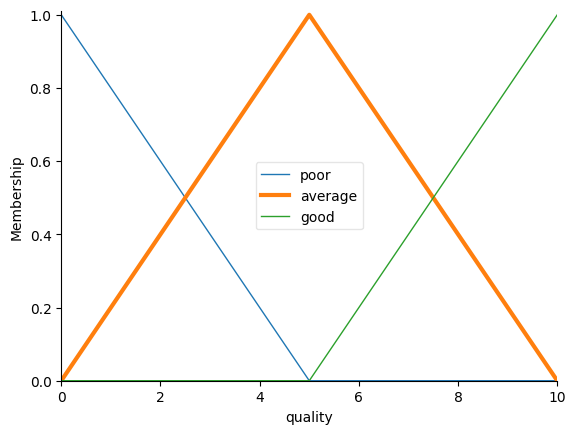

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

# You can see how these look with .view()
quality['average'].view()

/Users/master/Desktop/Fuzzy.Tutorial/venv/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


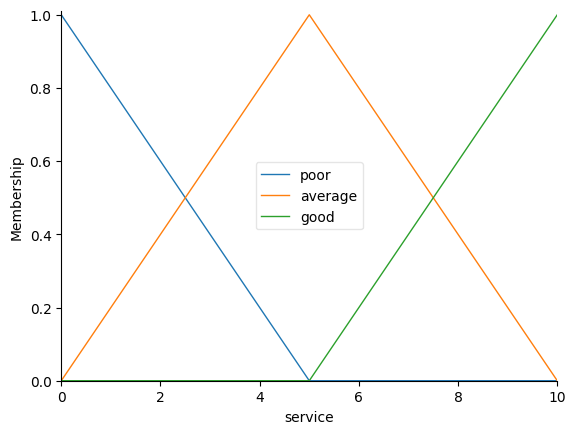

In [ ]:
service.view()


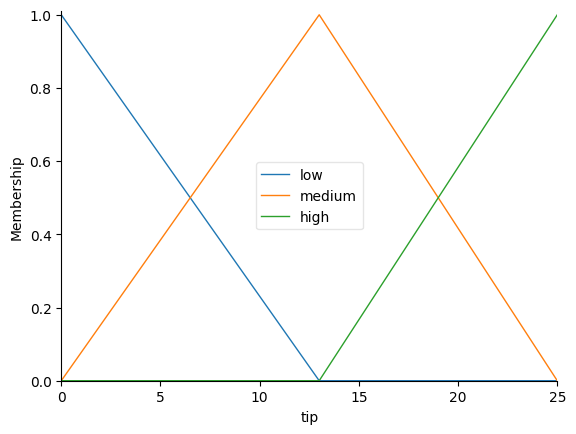

In [ ]:
tip.view()


# Fuzzy Rules

Now, to make these triangles useful, we define the fuzzy relationship between input and output variables. For the purposes of our example, consider three simple rules:

1. **If the food is poor OR the service is poor, then the tip will be low.**
2. **If the service is average, then the tip will be medium.**
3. **If the food is good OR the service is good, then the tip will be high.**

Most people would agree on these rules, but the rules are fuzzy. Mapping the imprecise rules into a defined, actionable tip is a challenge. This is the kind of task at which fuzzy logic excels.


(<Figure size 640x480 with 1 Axes>, <Axes: >)

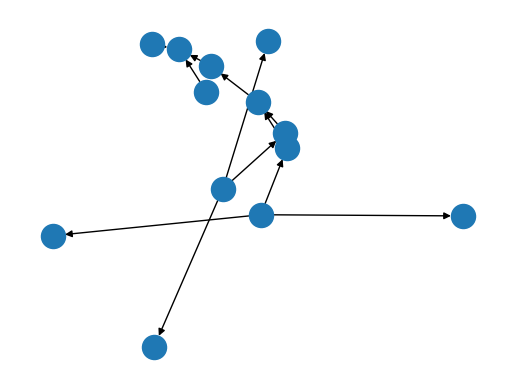

In [ ]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

# Control System Creation and Simulation

Now that we have our rules defined, we can simply create a control system via:

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])


In order to simulate this control system, we will create a `ControlSystemSimulation`. Think of this object as representing our controller applied to a specific set of circumstances. For tipping, this might be tipping Sharon at the local brew-pub. We would create another `ControlSystemSimulation` when we’re trying to apply our `tipping_ctrl` for Travis at the cafe because the inputs would be different.


In [ ]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)


We can now simulate our control system by simply specifying the inputs and calling the `compute` method. Suppose we rated the quality 6.5 out of 10 and the service 9.8 out of 10.


19.847607361963195


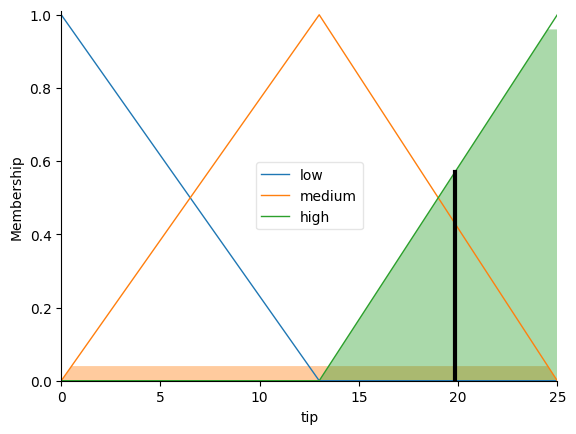

In [ ]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

# Once computed, we can view the result as well as visualize it.

print(tipping.output['tip'])
tip.view(sim=tipping)


# Defuzzification

Fuzzy logic calculations are excellent tools, but to use them the fuzzy result must be converted back into a single number. This is known as defuzzification.
There are several possible methods for defuzzification, exposed via skfuzzy.defuzz.

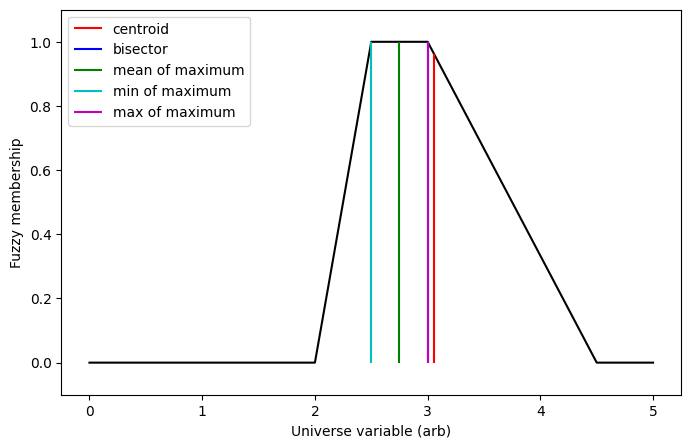

In [ ]:
import matplotlib.pyplot as plt

# Generate trapezoidal membership function on range [0, 1]
x = np.arange(0, 5.05, 0.1)
mfx = fuzz.trapmf(x, [2, 2.5, 3, 4.5])

# Defuzzify this membership function five ways
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')  # Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
          'max of maximum']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 5))

plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()